# NTC Simulation

In this file, the choice for the NTC linearization is made.

Change V to test other voltages

$$R_{ntc} = R_0 \cdot exp(\beta\cdot(\frac{1}{T} - \frac{1}{Tref}))$$

Note that the circuit used is the following:
        ______
Vcc ---| Rntc |----|---- Vout
       --------    | 
                 |---|
                 | Rs|
                 |___|
                   |
                   |
                  GND


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Values for NTC
R0 = 10e3
beta = 3435
Tref = 25 + 273

# Voltage for power calculation
V = 3.0

T = np.linspace(-10, 50, 500)

# Compute NTC resistance based on temperature
Rntc = R0 * np.exp( beta * ((1/(T+273)) - (1/Tref)) )

plt.plot(T, Rntc)
plt.xlabel("Temperatura ($\degree C$)")
plt.ylabel("Resistência NTC(Ohms)")



Text(0, 0.5, 'Resistência NTC(Ohms)')

# Plotting

In this cell, the curve for Vout is plotted against a linearized one (around 25 C), and against a 3rd order polynomial.

Errors, power dissipation and temperature are plotted as well.

To test new resistance values for Rs, add it to Rs_values List.

In [5]:

Rs_ideal = 10e3 * (beta - 2*Tref)/(beta + 2*Tref)
Rs_ideal

7042.917390225751

Slope:0.00936906604987231
 b: 0.17857071768986288
error 2 = 0.00020368417761111124
Slope:0.0096669087783645
 b: 0.25939273552869324
error 2 = 0.00010261122040286608


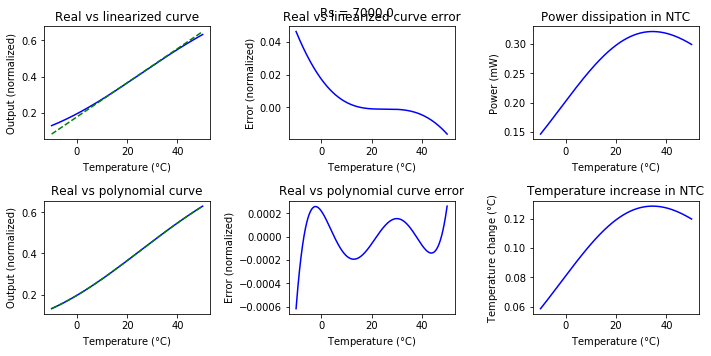

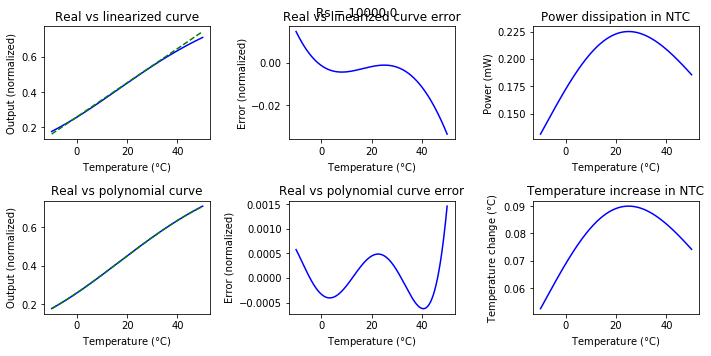

In [18]:
# Possible values for Rs
Rs_values = [7.0e3, 10e3]


for Rs in Rs_values:
    # Compute Vout based on NTC and 
    Vout = Rs/(Rs+Rntc)

    # Get slope at 25 C
    
    linearize_point = int(np.where( (T > 25.0) & (T<25.12))[0])
    
    slopeT = (Vout[linearize_point] - Vout[linearize_point - 1]) / (T[linearize_point]-T[linearize_point-1])
    bT = Vout[linearize_point]-slopeT*25
    
    print("Slope:{}\n b: {}".format(slopeT, bT))

    # Linearize around 25 C
    linVout = slopeT*T + bT
    

    # Make a 3rd order polynomial for approx
    z = np.polyfit(T,Vout,3)
    p = np.poly1d(z)

    # Start plotting figures
    
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.figure()

    plt.suptitle('Rs = {}'.format(Rs))

    
    # --- Real and linearized curve
    plt.subplot(2,3,1)

    # Plot real curve
    plt.plot(T, Vout, 'b')
    # Plot linearized curve
    plt.plot(T, linVout, 'g--')
    plt.xlabel('Temperature ($\degree$C)')
    plt.ylabel('Output (normalized)')

    plt.title('Real vs linearized curve')

    # --- Real and linearized curve error
    plt.subplot(2,3,2)

    # Plot error curve
    plt.plot(T, (Vout - linVout), 'b')

    plt.title('Real vs linearized curve error')

    plt.xlabel('Temperature ($\degree$C)')
    plt.ylabel('Error (normalized)')
    
    print("error 2 = {}".format(np.mean((Vout-linVout)**2)))
    
    plt.subplot(2,3,3)

    # Plot power on NTC
    PowerNTC = ((V**2)*(1-Vout)/(Rs+Rntc))*1000
    plt.plot(T, PowerNTC, 'b')

    plt.title('Power dissipation in NTC')

    plt.xlabel('Temperature ($\degree$C)')
    plt.ylabel('Power (mW)')

    # --- Real and polynomial approximation
    plt.subplot(2,3,4)

    # Plot real curve
    plt.plot(T, Vout, 'b')
    # Plot polynomial curve
    plt.plot(T, p(T), 'g--')

    plt.xlabel('Temperature ($\degree$C)')
    plt.ylabel('Output (normalized)')

    plt.title('Real vs polynomial curve')

    # --- Real and polynomial approximation error
    plt.subplot(2,3,5)

    # Plot real curve
    plt.plot(T, (Vout - p(T)), 'b')

    plt.title('Real vs polynomial curve error')
    plt.xlabel('Temperature ($\degree$C)')
    plt.ylabel('Error (normalized)')
    
    # Plot temperature increase on NTC
    plt.subplot(2,3,6)
    powerDissipation = 2.5 # mW/C
    plt.plot(T, PowerNTC/powerDissipation, 'b')

    plt.title('Temperature increase in NTC')

    plt.xlabel('Temperature ($\degree$C)')
    plt.ylabel('Temperature change ($\degree$C)')

    plt.tight_layout()



In [26]:

adc_val = 1400 #1400

#temp = slopeT*adc_val + bT
temp = (adc_val/4095 - bT) / slopeT

print(temp)

8.53298693955446


In [13]:
slopeT*adc_val

76242.61952769711

# Testing input and output impedance

slopeT